In [951]:
# step 1 : import the libraries
# step 2: analyze the data   
# step 3: Data wrangling (clear the data- remove unnecessary items)
# step 4: training and testing(split train and test)
# step 5: checking accuracy
# step 6: converting to csv file

In [952]:
import numpy as np
import pandas as pd
import seaborn as sbn
import matplotlib.pyplot as plt

In [953]:
# Here we read the training and testing data using the library pandas
titanic_data = pd.read_csv("train.csv", sep=',')
titanic_test_data = pd.read_csv("test.csv")
titanic_data.head(10) #printing the first ten of these as example

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [954]:
titanic_test_data.head(10) #printing the first ten of  testing set as example

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [955]:
print ("# of passengers:"+str(len(titanic_data.index)))
#titanic_data.describe()

# of passengers:891


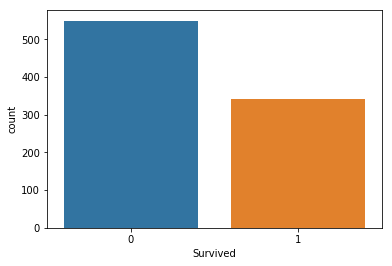

In [956]:
sbn.countplot(x="Survived",data=titanic_data) #who survived?

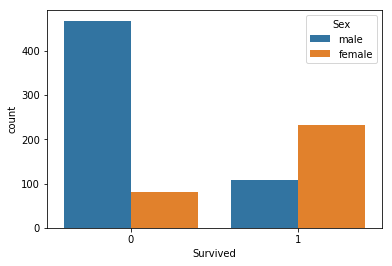

In [957]:
#Checking for all features to select final features
#how many were men/women ??
sbn.countplot(x="Survived",hue="Sex",data=titanic_data)

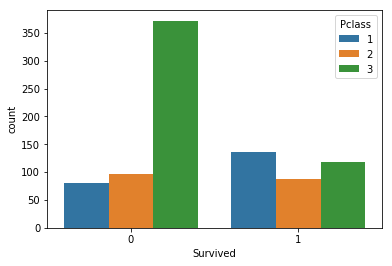

In [958]:
# passenger class analysis
sbn.countplot(x="Survived",hue="Pclass",data=titanic_data)

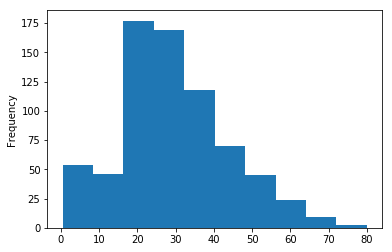

In [959]:
titanic_data['Age'].plot.hist()

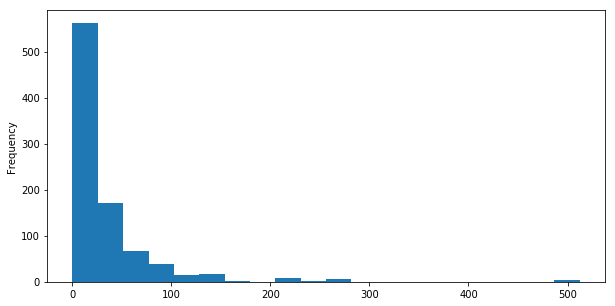

In [960]:
titanic_data["Fare"].plot.hist(bins=20, figsize=(10,5))

In [961]:
titanic_data.info() 
titanic_test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float

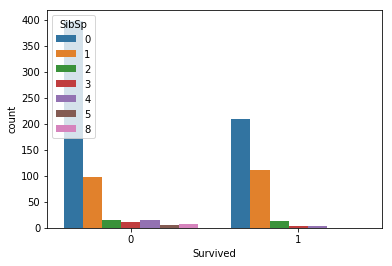

In [962]:
sbn.countplot(x="Survived",hue="SibSp",data=titanic_data) 

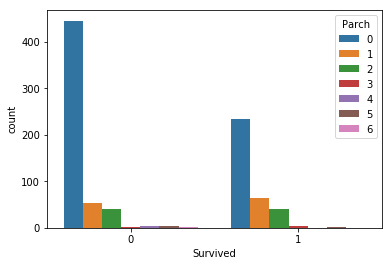

In [963]:
sbn.countplot(x="Survived",hue="Parch",data=titanic_data) 

In [964]:
# Data wrangling/cleaning the data
#NaN values to be removed or remove unnecessary items/columns
titanic_data.isnull() # checking for null values using isnull function

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
5,False,False,False,False,False,True,False,False,False,False,True,False
6,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,True,False
8,False,False,False,False,False,False,False,False,False,False,True,False
9,False,False,False,False,False,False,False,False,False,False,True,False


In [965]:
#to check which data is null
print(titanic_data.isnull().sum())
print(titanic_test_data.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


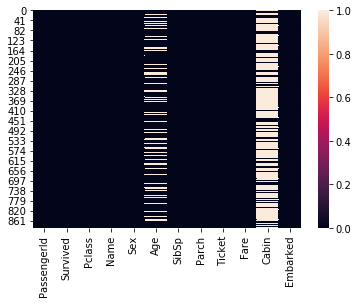

In [966]:
sbn.heatmap(titanic_data.isnull())

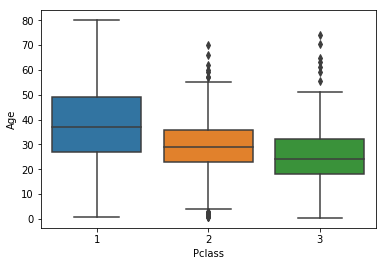

In [967]:
# either drop the column or replace with value
sbn.boxplot(x="Pclass",y="Age",data=titanic_data)

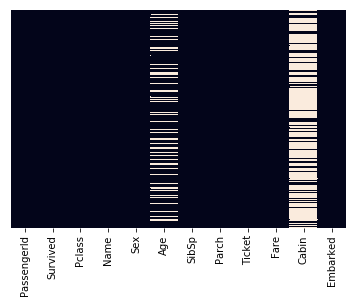

In [968]:
sbn.heatmap(titanic_data.isnull(), yticklabels=False, cbar=False)
#it is totally black --ence no null values - 

In [969]:
#another check : dataset is clean - no null or NaN values 
print(titanic_data.isnull().sum())
#we will drop age because of the null values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [970]:
#dropping cabin parameter since it is not required
titanic_data.drop("Cabin", axis=1, inplace=True)
titanic_test_data.drop("Cabin",axis=1,inplace=True)

In [971]:
#convert categorical gender parameter into dummy/indicator variable
sex = pd.get_dummies(titanic_data['Sex'],drop_first=True)
sex = pd.get_dummies(titanic_test_data['Sex'],drop_first=True)

In [972]:
#embarked are in S,C,Q to embark variable with S and C. So, if S and C are both 0 then it means Q is 1
embark = pd.get_dummies(titanic_data['Embarked'],drop_first=True)
#embarked are in S,C, Q
embark = pd.get_dummies(titanic_test_data['Embarked'],drop_first=True)

In [973]:
pcl = pd.get_dummies(titanic_data['Pclass'],drop_first=True)
pcl = pd.get_dummies(titanic_test_data['Pclass'],drop_first=True)

In [974]:
titanic_data = pd.concat([titanic_data,sex,embark,pcl], axis=1)
titanic_test_data = pd.concat([titanic_test_data,sex,embark,pcl], axis=1)

In [975]:
titanic_data.drop(['PassengerId','Pclass','Name','Sex','Ticket','Embarked','Age'], axis=1, inplace=True)
titanic_test_data.drop(["Pclass","Name","Sex","Ticket","Embarked",'Age'],axis=1, inplace=True)
dataframe = [titanic_data,titanic_test_data]
for dataset in dataframe:
    dataset['Fare'] = dataset['Fare'].fillna(0)
    dataset['Fare'] = dataset['Fare'].astype(int)
titanic_data.info()
titanic_test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
Survived    891 non-null int64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null int64
male        418 non-null float64
Q           418 non-null float64
S           418 non-null float64
2           418 non-null float64
3           418 non-null float64
dtypes: float64(5), int64(4)
memory usage: 62.7 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
PassengerId    418 non-null int64
SibSp          418 non-null int64
Parch          418 non-null int64
Fare           418 non-null int64
male           418 non-null uint8
Q              418 non-null uint8
S              418 non-null uint8
2              418 non-null uint8
3              418 non-null uint8
dtypes: int64(4), uint8(5)
memory usage: 15.2 KB


In [976]:
titanic_data.dropna(inplace=True)
titanic_test_data.dropna(inplace=True)
titanic_data.info()
titanic_test_data.info()
# Data wrangling is complete. Now, we will be training the data
X = titanic_data.drop('Survived', axis=1)
y = titanic_data["Survived"]
X_test  = titanic_test_data.drop("PassengerId", axis=1).copy()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 0 to 417
Data columns (total 9 columns):
Survived    418 non-null int64
SibSp       418 non-null int64
Parch       418 non-null int64
Fare        418 non-null int64
male        418 non-null float64
Q           418 non-null float64
S           418 non-null float64
2           418 non-null float64
3           418 non-null float64
dtypes: float64(5), int64(4)
memory usage: 32.7 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 0 to 417
Data columns (total 9 columns):
PassengerId    418 non-null int64
SibSp          418 non-null int64
Parch          418 non-null int64
Fare           418 non-null int64
male           418 non-null uint8
Q              418 non-null uint8
S              418 non-null uint8
2              418 non-null uint8
3              418 non-null uint8
dtypes: int64(4), uint8(5)
memory usage: 18.4 KB


In [977]:
from sklearn.linear_model import LogisticRegression
logisticmodel = LogisticRegression()
logisticmodel.fit(X,y)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [978]:
X_test.info()
y_prediction = logisticmodel.predict(X_test)
print(y_prediction)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 0 to 417
Data columns (total 8 columns):
SibSp    418 non-null int64
Parch    418 non-null int64
Fare     418 non-null int64
male     418 non-null uint8
Q        418 non-null uint8
S        418 non-null uint8
2        418 non-null uint8
3        418 non-null uint8
dtypes: int64(3), uint8(5)
memory usage: 15.1 KB
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0
 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0
 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 1 0 1 0 0 1
 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 1 

In [979]:
accuracy = round(logisticmodel.score(X,y) * 100, 2)
print(accuracy)
titanic_data.info()
titanic_test_data.info()

65.31
<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 0 to 417
Data columns (total 9 columns):
Survived    418 non-null int64
SibSp       418 non-null int64
Parch       418 non-null int64
Fare        418 non-null int64
male        418 non-null float64
Q           418 non-null float64
S           418 non-null float64
2           418 non-null float64
3           418 non-null float64
dtypes: float64(5), int64(4)
memory usage: 32.7 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 0 to 417
Data columns (total 9 columns):
PassengerId    418 non-null int64
SibSp          418 non-null int64
Parch          418 non-null int64
Fare           418 non-null int64
male           418 non-null uint8
Q              418 non-null uint8
S              418 non-null uint8
2              418 non-null uint8
3              418 non-null uint8
dtypes: int64(4), uint8(5)
memory usage: 18.4 KB


In [980]:
ids = titanic_test_data['PassengerId']
output = pd.DataFrame({'PassengerId': ids,'Survived': y_prediction})
output.to_csv('titanicoutputsubmission.csv',index=False)
output

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
5,897,0
6,898,0
7,899,0
8,900,0
9,901,0
